In [128]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
df = pd.read_csv('Advertising.csv')

In [130]:
!pip install seaborn matplotlib


<Axes: >

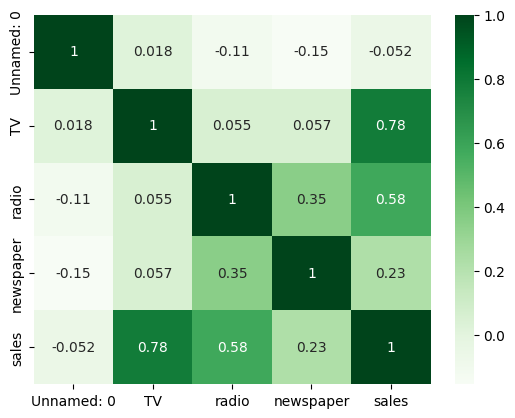

In [131]:

corr_mat = df.corr()
# print(corr_mat)
sns.heatmap(corr_mat, cmap='Greens', annot=True)

In [132]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [133]:
features_name = ['TV' ]#, 'radio', 'newspaper']
target = 'sales'
X = df[features_name]
y = df[target]

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=7, test_size=0.2
)

In [135]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [136]:
model.coef_, model.intercept_

(array([0.0472749]), np.float64(7.174077193684607))

In [137]:
y_hat = model.predict(X_test)

In [138]:
from sklearn.metrics import root_mean_squared_error, r2_score 
print(f"Root mean square error {root_mean_squared_error(y_hat, y_test)}")
print(f"R2 score {r2_score(y_test, y_hat)}")

Root mean square error 2.940968456350126
R2 score 0.677948852576193


In [139]:
X_flat = X_test.to_numpy().flatten()
# X_flat

Text(0, 0.5, 'Sale')

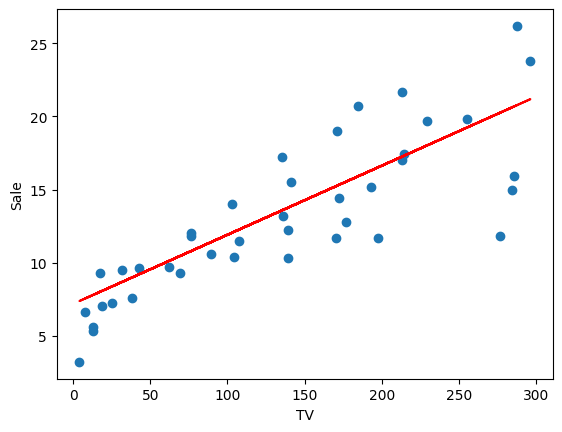

In [140]:
plt.scatter(X_flat, y_test)
plt.plot(X_flat, y_hat, c='r')

plt.xlabel('TV')
plt.ylabel('Sale')

# Linear Regression Implementation

In [141]:
X = df['TV'].to_numpy()
y = df['sales']

In [142]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = 

X = (X - min(X)) / (max(X) - min(X))

In [143]:
X

array([0.77578627, 0.1481231 , 0.0557998 , 0.50997633, 0.60906324,
       0.02705445, 0.19208657, 0.4041258 , 0.02671627, 0.67331755,
       0.2211701 , 0.72370646, 0.07811972, 0.32735881, 0.68785932,
       0.65843761, 0.22691917, 0.94927291, 0.2316537 , 0.49577274,
       0.73621914, 0.80047345, 0.04227257, 0.76969902, 0.20831924,
       0.8867095 , 0.4808928 , 0.80960433, 0.83902604, 0.23638823,
       0.98816368, 0.37943862, 0.32634427, 0.89584038, 0.32127156,
       0.98072371, 0.90023673, 0.25025364, 0.14338857, 0.76868448,
       0.68244843, 0.59621238, 0.99053094, 0.69732837, 0.08251606,
       0.58978695, 0.30098072, 0.80892797, 0.76597903, 0.22387555,
       0.67331755, 0.33716605, 0.72945553, 0.61515049, 0.88603314,
       0.67027393, 0.02231992, 0.4582347 , 0.71051742, 0.71017924,
       0.17855935, 0.88129861, 0.80689888, 0.3449442 , 0.44098749,
       0.23097734, 0.10415962, 0.4687183 , 0.80047345, 0.73080825,
       0.67095029, 0.36895502, 0.08826513, 0.43523842, 0.71931

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

hello model w: 0.6996948425195444 b: 0.9243268046196406
after 0 epoch w: 0.7740075903831194 b: 1.0518457333102917; loss: 94.04383073025187
after 1 epoch w: 0.8474449004970731 b: 1.1777216974923852; loss: 91.87921282624549
after 2 epoch w: 0.9200177824084972 b: 1.3019754593693047; loss: 89.76881701675316
after 3 epoch w: 0.9917371067119846 b: 1.4246275190359392; loss: 87.71128309682958
after 4 epoch w: 1.062613606803693 b: 1.5456981177874467; loss: 85.70528498600284
after 5 epoch w: 1.1326578806132652 b: 1.6652072413862489; loss: 83.74952987216479
after 6 epoch w: 1.2018803923138859 b: 1.7831746232877856; loss: 81.84275737693946
after 7 epoch w: 1.270291474010752 b: 1.8996197478255472; loss: 79.9837387419906
after 8 epoch w: 1.3379013274082288 b: 2.014561853355901; loss: 78.17127603574298
after 9 epoch w: 1.404720025455959 b: 2.12801993536322; loss: 76.4042013800053
after 10 epoch w: 1.4707575139741946 b: 2.2400127495258104; loss: 74.68137619599564
after 11 epoch w: 1.536023613258608 b:

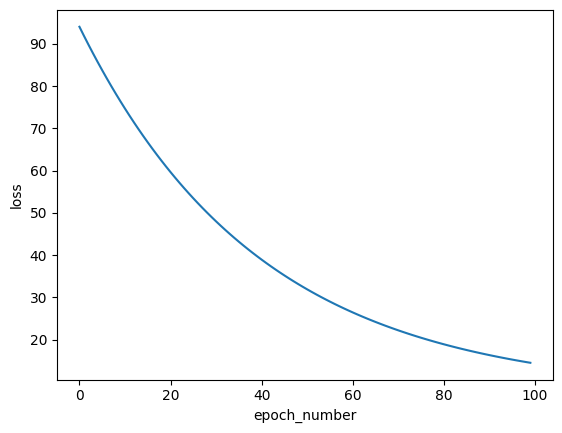

In [145]:
class MyLinearRegression: 
    def __init__(self):
        self.params = {}
        self.params['w'] = np.random.rand()
        self.params['b'] = np.random.rand() 
        print(f"hello model w: {self.params['w']} b: {self.params['b']}")
    
    def calculate_loss(self, y, y_hat):
        # m = len(y)
        # return np.sum((y_hat - y) * (y_hat - y)) / 2 * m 
        return np.average((y_hat - y) ** 2) / 2
    
    def predict(self, X): 
        return self.params['w'] * X + self.params['b']
    
    def calculate_derivatives(self, X, y, y_hat):
        dw = np.average((y_hat - y) * X)
        db = np.average((y_hat - y))
        derivative = {
            'db' : db, 
            'dw' : dw 
        }

        return derivative
    
    def fit(self, X, y, epoch_num = 100): 
        lr = 0.01
        losses = []
        for epoch in range(epoch_num): 
            y_hat = self.predict(X)
            derivative = self.calculate_derivatives(X, y, y_hat)
            self.params['w'] = self.params['w'] - lr * derivative['dw']
            self.params['b'] = self.params['b'] - lr * derivative['db']
            loss = self.calculate_loss(y, y_hat)
            print(f"after {epoch} epoch w: {self.params['w']} b: {self.params['b']}; loss: {loss}")
            losses.append(loss)
        
        plt.plot(losses)
        plt.xlabel('epoch_number')
        plt.ylabel('loss')


model = MyLinearRegression()

model.fit(X, y)

In [146]:
np.random.rand()

0.4422498202175136